# Humana Mays Healthcare Analysis Case Competition, 2020

## Team Quark

## Necessary packages and libraries

**Install packages**

In [64]:
#!pip install <any package that's not loaded already in your system>

In [35]:
# To ignore any warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

**Load the packages/libraries**

In [36]:
# All packages and libraries that are essential
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from pandas import DataFrame
from sklearn import datasets
from scipy.special import comb
from IPython.display import display
from random import sample
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import dabl
%matplotlib inline

## Read the training data

In [72]:
# Read the file
df = pd.read_csv('2020_Competition_Training.csv')

C:\Users\its_t\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (80,193) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [73]:
# File info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69572 entries, 0 to 69571
Columns: 826 entries, person_id_syn to submcc_rsk_chol_ind
dtypes: float64(443), int64(361), object(22)
memory usage: 438.4+ MB


In [74]:
# To print top 10 records form the file
df.head(10)

,person_id_syn,transportation_issues,src_platform_cd,sex_cd,est_age,smoker_current_ind,smoker_former_ind,lang_spoken_cd,mabh_seg,cci_score,...,submcc_rar_scl_ind,rx_gpi2_74_ind,rx_gpi2_89_ind,rx_gpi2_96_ind,submcc_rsk_obe_ind,rx_gpi2_22_ind,submcc_rsk_synx_ind,submcc_rsk_coag_ind,submcc_rsk_othr_ind,submcc_rsk_chol_ind
0,0002MOb79ST17bLYAe46eIc2,0,EM,F,62,1,0,ENG,UNK,3.0,...,0,0,0,0,0,0,0,0,0,0
1,0004cMOS6bTLf34Y7AIca8f3,0,EM,F,59,1,0,ENG,C2,1.0,...,0,0,0,0,1,0,0,0,0,1
2,000536M9O3ST98LaYaeA29Ia,1,EM,F,63,0,0,ENG,UNK,3.0,...,0,0,0,0,0,0,0,0,0,1
3,0009bMO9SfTLYe77A51I4ac3,0,EM,M,75,0,0,ENG,H6,3.0,...,0,0,0,0,1,0,0,0,0,1
4,000M7OeS66bTL8bY89Aa16Ie,0,EM,M,51,1,0,ENG,UNK,3.0,...,0,0,0,0,0,0,0,0,0,1
5,000MOa9ScTdLa4d9f3YAI068,0,EM,F,73,0,0,ENG,H2,4.0,...,0,0,0,0,1,0,0,0,0,1
6,0013dMOS3TeL28YA12ea5ecI,0,EM,F,57,0,0,ENG,H6,1.0,...,0,0,0,0,0,0,0,0,0,1
7,001548d79bMeO7S283TLYAI0,0,EM,F,83,0,0,ENG,UNK,4.0,...,0,0,0,0,1,0,0,0,0,1
8,0015M1Ob8S1bT1086LYAf9Ia,1,EM,F,56,0,0,ENG,H3,6.0,...,0,0,0,0,0,0,0,0,0,1
9,0015M23c489ObSb70TLYcbAI,0,LV,M,69,0,0,ENG,H4,2.0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
# Print the features from the file
df.columns

Index(['person_id_syn', 'transportation_issues', 'src_platform_cd', 'sex_cd',
       'est_age', 'smoker_current_ind', 'smoker_former_ind', 'lang_spoken_cd',
       'mabh_seg', 'cci_score',
       ...
       'submcc_rar_scl_ind', 'rx_gpi2_74_ind', 'rx_gpi2_89_ind',
       'rx_gpi2_96_ind', 'submcc_rsk_obe_ind', 'rx_gpi2_22_ind',
       'submcc_rsk_synx_ind', 'submcc_rsk_coag_ind', 'submcc_rsk_othr_ind',
       'submcc_rsk_chol_ind'],
      dtype='object', length=826)

In [75]:
# Records - rows and columns
df.shape

(69572, 826)

In [76]:
# Summarize the data for each feature
df.describe(include='all')

,person_id_syn,transportation_issues,src_platform_cd,sex_cd,est_age,smoker_current_ind,smoker_former_ind,lang_spoken_cd,mabh_seg,cci_score,...,submcc_rar_scl_ind,rx_gpi2_74_ind,rx_gpi2_89_ind,rx_gpi2_96_ind,submcc_rsk_obe_ind,rx_gpi2_22_ind,submcc_rsk_synx_ind,submcc_rsk_coag_ind,submcc_rsk_othr_ind,submcc_rsk_chol_ind
count,69572,69572.000000,69572,69572,69572.000000,69572.000000,69572.000000,69572,69572,69572.000000,...,69572.000000,69572.000000,69572.000000,69572.0,69572.000000,69572.000000,69572.000000,69572.000000,69572.0,69572.000000
unique,69572,NaN,2,2,NaN,NaN,NaN,3,16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,b39Ma49dO3S09bTL407YA15I,NaN,EM,F,NaN,NaN,NaN,ENG,H2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,49999,41112,NaN,NaN,NaN,63905,16418,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.146568,NaN,NaN,70.815673,0.134824,0.144368,NaN,NaN,4.708029,...,0.000029,0.000014,0.001854,0.0,0.446918,0.210286,0.001466,0.000920,0.0,0.711536
std,NaN,0.353677,NaN,NaN,10.417384,0.341538,0.351465,NaN,NaN,2.403738,...,0.005362,0.003791,0.043021,0.0,0.497178,0.407514,0.038262,0.030316,0.0,0.453051
min,NaN,0.000000,NaN,NaN,18.000000,0.000000,0.000000,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,NaN,0.000000,NaN,NaN,66.000000,0.000000,0.000000,NaN,NaN,3.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,NaN,0.000000,NaN,NaN,71.000000,0.000000,0.000000,NaN,NaN,4.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,NaN,0.000000,NaN,NaN,77.000000,0.000000,0.000000,NaN,NaN,6.000000,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0,1.000000


In [10]:
# Correlation table
df.corr(method='pearson')

,transportation_issues,est_age,smoker_current_ind,smoker_former_ind,cci_score,dcsi_score,fci_score,hcc_weighted_sum,betos_d1c_pmpm_ct,betos_d1d_pmpm_ct,...,submcc_rar_scl_ind,rx_gpi2_74_ind,rx_gpi2_89_ind,rx_gpi2_96_ind,submcc_rsk_obe_ind,rx_gpi2_22_ind,submcc_rsk_synx_ind,submcc_rsk_coag_ind,submcc_rsk_othr_ind,submcc_rsk_chol_ind
transportation_issues,1.000000,-0.182090,0.099859,-0.014584,-0.010039,0.052572,0.103049,0.028337,0.037055,0.039303,...,0.012938,-0.001571,0.003866,NaN,0.043060,0.025502,-0.005258,0.006193,NaN,-0.026332
est_age,-0.182090,1.000000,-0.171495,0.064805,0.409230,0.148596,0.004075,0.142295,0.001945,-0.007587,...,0.000095,0.000795,-0.001130,NaN,-0.074695,-0.031476,0.000786,-0.005061,NaN,0.119659
smoker_current_ind,0.099859,-0.171495,1.000000,-0.162033,0.032805,0.079364,0.139417,0.070619,0.084098,0.018014,...,-0.002117,-0.001497,0.006464,NaN,0.007610,0.067078,0.001373,0.000515,NaN,0.023018
smoker_former_ind,-0.014584,0.064805,-0.162033,1.000000,0.143096,0.125453,0.128855,0.117036,0.078879,0.026093,...,0.005425,-0.001557,0.013667,NaN,0.062775,0.048260,0.004569,0.014516,NaN,0.061774
cci_score,-0.010039,0.409230,0.032805,0.143096,1.000000,0.667714,0.497159,0.573247,0.149950,0.088745,...,0.002882,0.002038,0.013436,NaN,0.133303,0.102886,0.013094,0.030708,NaN,0.257820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rx_gpi2_22_ind,0.025502,-0.031476,0.067078,0.048260,0.102886,0.091271,0.208342,0.120786,0.085768,0.027698,...,0.003812,0.007347,0.020393,NaN,0.071908,1.000000,0.010648,0.015755,NaN,0.049688
submcc_rsk_synx_ind,-0.005258,0.000786,0.001373,0.004569,0.013094,0.014431,0.025156,0.011604,0.005325,0.001879,...,-0.000205,-0.000145,0.024545,NaN,0.012403,0.010648,1.000000,-0.001163,NaN,0.014447
submcc_rsk_coag_ind,0.006193,-0.005061,0.000515,0.014516,0.030708,0.030917,0.026798,0.029934,0.007163,0.012462,...,-0.000163,-0.000115,0.009713,NaN,0.005147,0.015755,-0.001163,1.000000,NaN,0.006762
submcc_rsk_othr_ind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


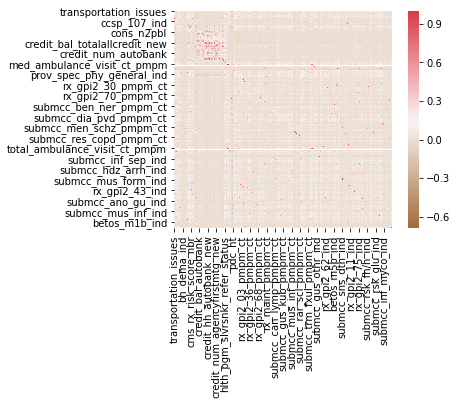

In [11]:
# Print the correlation matrix

# Put in comments to be removed later - this code takes a long time to generate corr for every feature.
'''
corr = df.corr(method='pearson')
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(400, 10, as_cmap=True),square=True)
'''

## Data Wrangling

In [11]:
# Check for total null values
df.isnull().values.sum()

512802

In [77]:
# Null or NAs by column
naColumns = df.isnull().sum()

# naColumns.sort_values()

# Sort for top 20 with Nas
naColumns.sort_values().tail(20)

cms_ma_risk_score_nbr       3772
cms_partd_ra_factor_amt     3814
cms_ra_factor_type_cd       4224
cons_cmys                  19267
cons_online_buyer          19275
cons_hhcomp                19277
cons_n2mob                 19278
cons_hcaccprf_h            19278
cons_hcaccprf_p            19278
cons_veteran_y             19278
cons_n65p_y                19278
cons_n2pmv                 19278
cons_n2pbl                 19278
cons_retail_buyer          19279
cons_ret_y                 19279
cons_n2029_y               19279
cons_homstat               19280
hedis_cmc_ldc_c_screen     54930
hedis_cmc_ldc_c_control    54932
hedis_ami                  69339
dtype: int64

Text(0.5, 0, 'Top 20 variables with missing values')

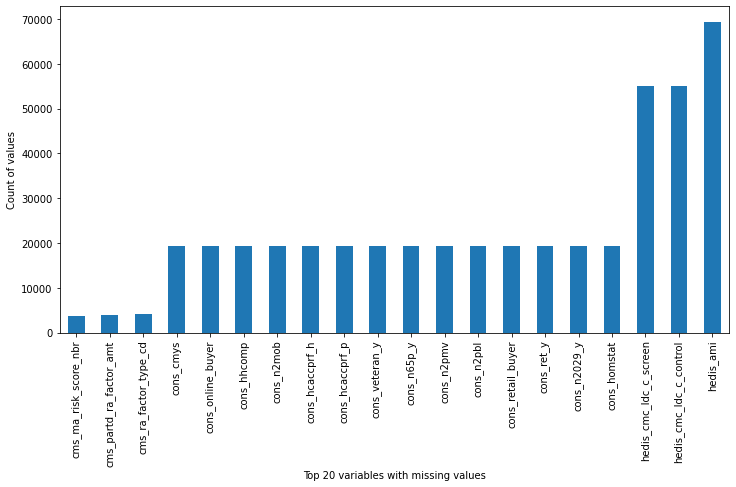

In [13]:
x = naColumns.sort_values().tail(20)

# Print the count of missing NA values
x.plot.bar(figsize=(12,6))
plt.ylabel('Count of values')
plt.xlabel('Top 20 variables with missing values')

In [78]:
# Number of unique values 
df.nunique()

# To check for any one variable:
# df['est_age'].nunique()

person_id_syn            69572
transportation_issues        2
src_platform_cd              2
sex_cd                       2
est_age                     83
                         ...  
rx_gpi2_22_ind               2
submcc_rsk_synx_ind          2
submcc_rsk_coag_ind          2
submcc_rsk_othr_ind          1
submcc_rsk_chol_ind          2
Length: 826, dtype: int64

In [15]:
# To plot the distribution of each feature

# the code is commented because there are just too many features but one can check it for one or two random ones
# df.hist(bins=30, figsize=(12,12), density=True)
# plt.show()

In [79]:
# Removing the features which have more than 80% NAs

limit = len(df) * .80
new_df = df.dropna(thresh=limit,axis=1)
new_df

,person_id_syn,transportation_issues,src_platform_cd,sex_cd,est_age,smoker_current_ind,smoker_former_ind,lang_spoken_cd,mabh_seg,cci_score,...,submcc_rar_scl_ind,rx_gpi2_74_ind,rx_gpi2_89_ind,rx_gpi2_96_ind,submcc_rsk_obe_ind,rx_gpi2_22_ind,submcc_rsk_synx_ind,submcc_rsk_coag_ind,submcc_rsk_othr_ind,submcc_rsk_chol_ind
0,0002MOb79ST17bLYAe46eIc2,0,EM,F,62,1,0,ENG,UNK,3.0,...,0,0,0,0,0,0,0,0,0,0
1,0004cMOS6bTLf34Y7AIca8f3,0,EM,F,59,1,0,ENG,C2,1.0,...,0,0,0,0,1,0,0,0,0,1
2,000536M9O3ST98LaYaeA29Ia,1,EM,F,63,0,0,ENG,UNK,3.0,...,0,0,0,0,0,0,0,0,0,1
3,0009bMO9SfTLYe77A51I4ac3,0,EM,M,75,0,0,ENG,H6,3.0,...,0,0,0,0,1,0,0,0,0,1
4,000M7OeS66bTL8bY89Aa16Ie,0,EM,M,51,1,0,ENG,UNK,3.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69567,ffe33MOS25dTf027LaY7A5I3,0,EM,F,72,1,0,ENG,H7,5.0,...,0,0,0,0,0,1,0,0,0,1
69568,fff1M4O1cfST49LY464A2Ieb,0,EM,M,75,0,0,ENG,C4,9.0,...,0,0,0,0,1,0,0,0,0,1
69569,fff5MO7e401STLYcAd8e581I,0,EM,M,76,0,0,ENG,H6,6.0,...,0,0,0,0,0,0,0,0,0,1
69570,fffMc37OSfTLfY7853dfA09I,0,LV,M,67,0,1,ENG,H6,2.0,...,0,0,0,0,1,0,0,0,0,0


In [80]:
new_df.shape
# new df has 809 columns against 822 in the original

(69572, 809)

In [81]:
# Re-assigning to df the the new df with more clean data will lesser NAs.
df = new_df

In [82]:
# Fill the missing NAs for rows now

def filling(df):
    for i in df:
        if df[i].dtypes == object:
            fill = df[i].mode().iat[0]
            df.loc[:,i] = df[i].replace(np.nan,fill)
        else:
            the_mean = df[i].mean(skipna=True)
            df.loc[:,i] = df[i].replace(np.nan,the_mean)

filling(df)

In [83]:
# Should show no more NAs
df.isnull().values.sum()

0

## EDA - Exploratory Data Analysis

In [30]:
# Checking for feature type
types = dabl.detect_types(df)
print(types)

                       continuous  dirty_float  low_card_int  categorical  \
person_id_syn               False        False         False        False   
transportation_issues       False        False         False         True   
src_platform_cd             False        False         False         True   
sex_cd                      False        False         False         True   
est_age                     False        False          True        False   
...                           ...          ...           ...          ...   
rx_gpi2_22_ind              False        False         False         True   
submcc_rsk_synx_ind         False        False         False        False   
submcc_rsk_coag_ind         False        False         False        False   
submcc_rsk_othr_ind         False        False         False        False   
submcc_rsk_chol_ind         False        False         False         True   

                        date  free_string  useless  
person_id_syn         

C:\Users\its_t\AppData\Local\Continuum\anaconda3\lib\site-packages\dabl\preprocessing.py:318: UserWarning: Discarding near-constant features: ['betos_d1c_pmpm_ct', 'betos_d1d_pmpm_ct', 'betos_m2c_pmpm_ct', 'betos_o1b_pmpm_ct', 'bh_adtp_ind', 'bh_bipr_ind', 'bh_cdal_ind', 'ccsp_014_ind', 'ccsp_020_ind', 'ccsp_021_ind', 'ccsp_034_ind', 'ccsp_060_ind', 'ccsp_080_ind', 'ccsp_107_ind', 'ccsp_120_ind', 'ccsp_125_ind', 'ccsp_130_ind', 'ccsp_163_ind', 'ccsp_169_ind', 'ccsp_204_ind', 'ccsp_205_ind', 'ccsp_212_ind', 'ccsp_242_ind', 'cms_hospice_ind', 'hedis_dia_eye', 'hedis_dia_hba1c_ge9', 'hlth_pgm_slvrsnkr_refer_status', 'lab_bnp_abn_result_ind', 'lab_hba1_c_abn_result_ind', 'med_ip_ltach_admit_ct_pmpm', 'med_ip_ltach_admit_days_pmpm', 'med_ip_maternity_admit_ct_pmpm', 'med_ip_maternity_admit_days_pmpm', 'med_ip_mhsa_admit_ct_pmpm', 'med_ip_mhsa_admit_days_pmpm', 'med_ip_rehab_admit_ct_pmpm', 'med_ip_rehab_admit_days_pmpm', 'med_ip_snf_admit_ct_pmpm', 'med_ip_snf_admit_days_pmpm', 'pdc_ost', '

C:\Users\its_t\AppData\Local\Continuum\anaconda3\lib\site-packages\dabl\preprocessing.py:318: UserWarning: Discarding near-constant features: ['betos_d1c_pmpm_ct', 'betos_d1d_pmpm_ct', 'betos_m2c_pmpm_ct', 'betos_o1b_pmpm_ct', 'bh_adtp_ind', 'bh_bipr_ind', 'bh_cdal_ind', 'ccsp_014_ind', 'ccsp_020_ind', 'ccsp_021_ind', 'ccsp_034_ind', 'ccsp_060_ind', 'ccsp_080_ind', 'ccsp_107_ind', 'ccsp_120_ind', 'ccsp_125_ind', 'ccsp_130_ind', 'ccsp_163_ind', 'ccsp_169_ind', 'ccsp_204_ind', 'ccsp_205_ind', 'ccsp_212_ind', 'ccsp_242_ind', 'cms_hospice_ind', 'hedis_dia_eye', 'hedis_dia_hba1c_ge9', 'hlth_pgm_slvrsnkr_refer_status', 'lab_bnp_abn_result_ind', 'lab_hba1_c_abn_result_ind', 'med_ip_ltach_admit_ct_pmpm', 'med_ip_ltach_admit_days_pmpm', 'med_ip_maternity_admit_ct_pmpm', 'med_ip_maternity_admit_days_pmpm', 'med_ip_mhsa_admit_ct_pmpm', 'med_ip_mhsa_admit_days_pmpm', 'med_ip_rehab_admit_ct_pmpm', 'med_ip_rehab_admit_days_pmpm', 'med_ip_snf_admit_ct_pmpm', 'med_ip_snf_admit_days_pmpm', 'pdc_ost', '

Target looks like classification
Showing only top 10 of 263 continuous features


C:\Users\its_t\AppData\Local\Continuum\anaconda3\lib\site-packages\dabl\plot\utils.py:621: UserWarning: Dropped 28 outliers in column cms_tot_partd_payment_amt.
  int(dropped), series.name), UserWarning)
C:\Users\its_t\AppData\Local\Continuum\anaconda3\lib\site-packages\dabl\plot\utils.py:621: UserWarning: Dropped 71 outliers in column cms_rx_risk_score_nbr.
  int(dropped), series.name), UserWarning)
C:\Users\its_t\AppData\Local\Continuum\anaconda3\lib\site-packages\dabl\plot\utils.py:621: UserWarning: Dropped 75 outliers in column cms_partd_ra_factor_amt.
  int(dropped), series.name), UserWarning)
C:\Users\its_t\AppData\Local\Continuum\anaconda3\lib\site-packages\dabl\plot\utils.py:621: UserWarning: Dropped 66 outliers in column rx_overall_pmpm_ct.
  int(dropped), series.name), UserWarning)
C:\Users\its_t\AppData\Local\Continuum\anaconda3\lib\site-packages\dabl\plot\utils.py:621: UserWarning: Dropped 126 outliers in column rx_generic_pmpm_ct.
  int(dropped), series.name), UserWarning)

Linear Discriminant Analysis training set score: 0.558
Showing only top 10 of 186 categorical features


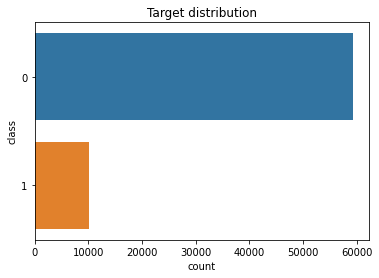

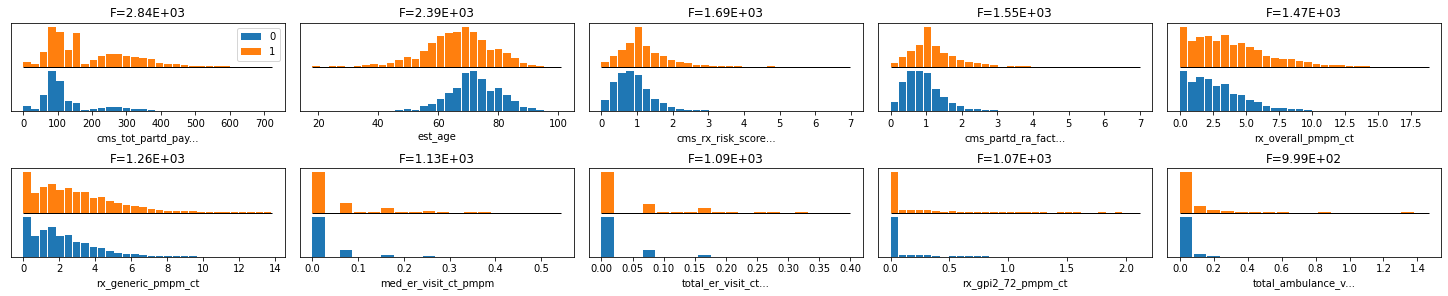

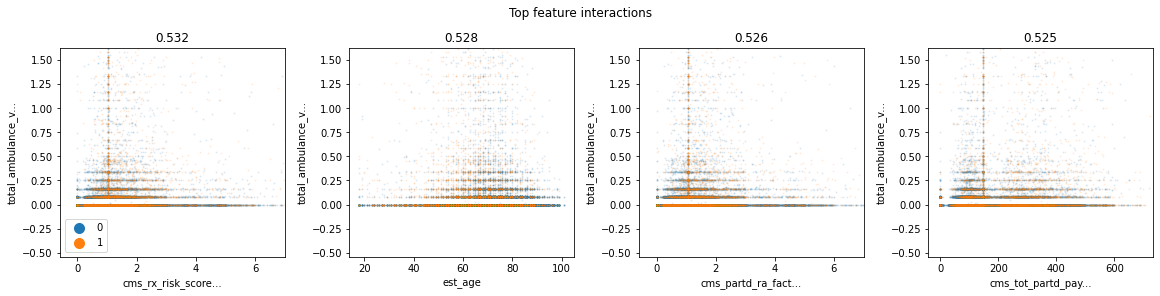

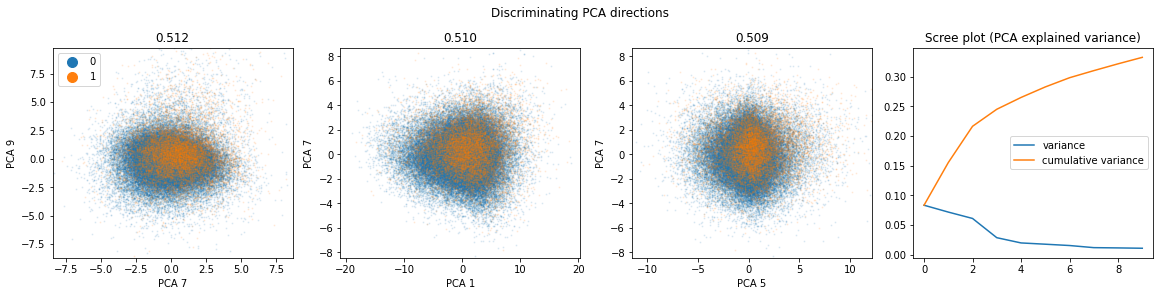

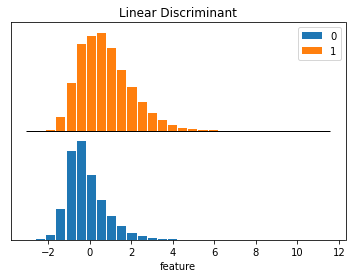

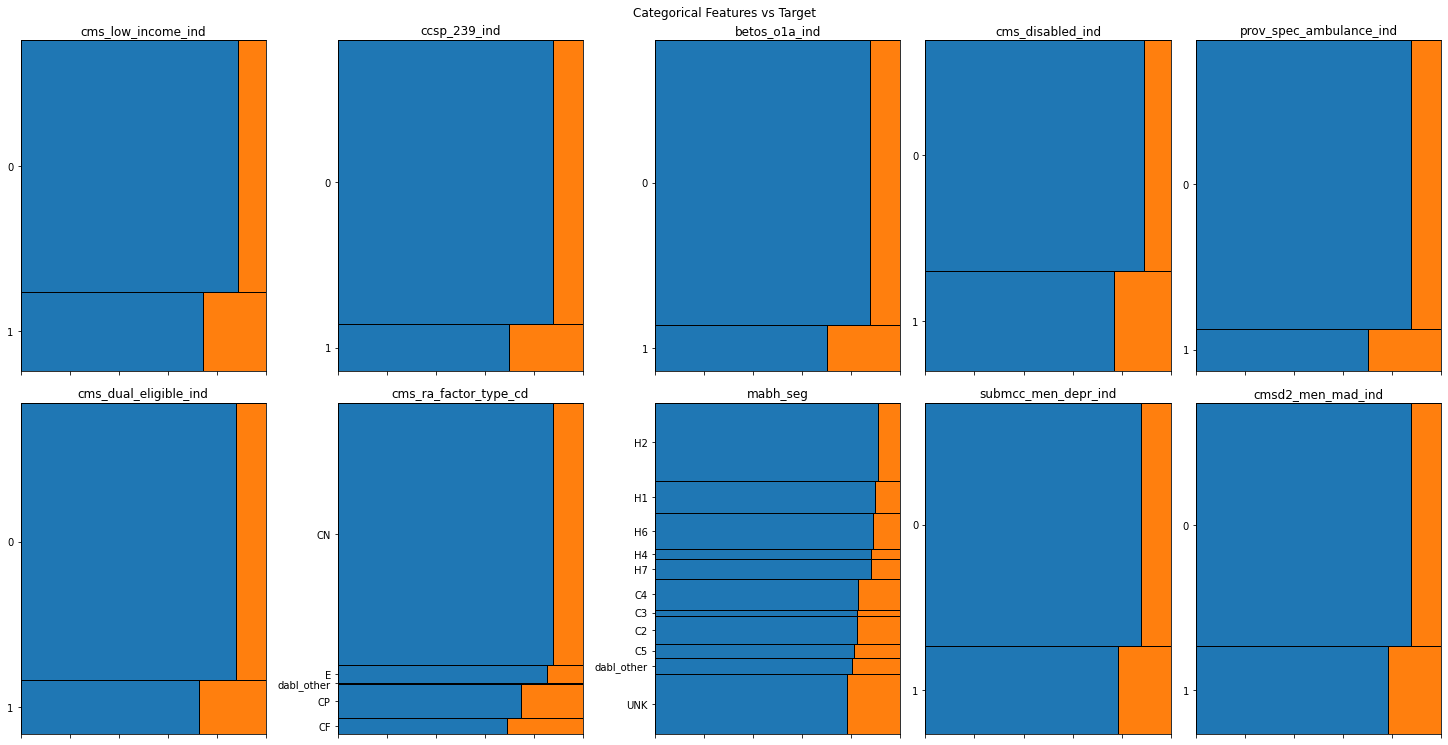

In [31]:
# What do we have for our predictor variable - 'transportation_issues'

import dabl
dabl.plot(df, target_col="transportation_issues")

## Slicing the data

In [89]:
## split the age in groups

def age_group(age):
    # 1 represents young population
    if age >= 18 and age <= 30:
        return 1
    # 2 represents mid life population
    elif age > 30 and age <= 40:
        return 2
    # 3 represents senior population
    elif age > 40 and age <=60:
        return 3
    # 4 represents people above 60 and can be termed as veterans
    else:
        return 4
    
df['age_group'] = df['est_age'].apply(age_group)
df

,person_id_syn,transportation_issues,src_platform_cd,sex_cd,est_age,smoker_current_ind,smoker_former_ind,lang_spoken_cd,mabh_seg,cci_score,...,rx_gpi2_74_ind,rx_gpi2_89_ind,rx_gpi2_96_ind,submcc_rsk_obe_ind,rx_gpi2_22_ind,submcc_rsk_synx_ind,submcc_rsk_coag_ind,submcc_rsk_othr_ind,submcc_rsk_chol_ind,age_group
0,0002MOb79ST17bLYAe46eIc2,0,EM,F,62,1,0,ENG,UNK,3.0,...,0,0,0,0,0,0,0,0,0,4
1,0004cMOS6bTLf34Y7AIca8f3,0,EM,F,59,1,0,ENG,C2,1.0,...,0,0,0,1,0,0,0,0,1,3
2,000536M9O3ST98LaYaeA29Ia,1,EM,F,63,0,0,ENG,UNK,3.0,...,0,0,0,0,0,0,0,0,1,4
3,0009bMO9SfTLYe77A51I4ac3,0,EM,M,75,0,0,ENG,H6,3.0,...,0,0,0,1,0,0,0,0,1,4
4,000M7OeS66bTL8bY89Aa16Ie,0,EM,M,51,1,0,ENG,UNK,3.0,...,0,0,0,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69567,ffe33MOS25dTf027LaY7A5I3,0,EM,F,72,1,0,ENG,H7,5.0,...,0,0,0,0,1,0,0,0,1,4
69568,fff1M4O1cfST49LY464A2Ieb,0,EM,M,75,0,0,ENG,C4,9.0,...,0,0,0,1,0,0,0,0,1,4
69569,fff5MO7e401STLYcAd8e581I,0,EM,M,76,0,0,ENG,H6,6.0,...,0,0,0,0,0,0,0,0,1,4
69570,fffMc37OSfTLfY7853dfA09I,0,LV,M,67,0,1,ENG,H6,2.0,...,0,0,0,1,0,0,0,0,0,4


In [90]:
df_male = df[df['sex_cd'] == 'M']

In [91]:
df_male.head(10)

,person_id_syn,transportation_issues,src_platform_cd,sex_cd,est_age,smoker_current_ind,smoker_former_ind,lang_spoken_cd,mabh_seg,cci_score,...,rx_gpi2_74_ind,rx_gpi2_89_ind,rx_gpi2_96_ind,submcc_rsk_obe_ind,rx_gpi2_22_ind,submcc_rsk_synx_ind,submcc_rsk_coag_ind,submcc_rsk_othr_ind,submcc_rsk_chol_ind,age_group
3,0009bMO9SfTLYe77A51I4ac3,0,EM,M,75,0,0,ENG,H6,3.0,...,0,0,0,1,0,0,0,0,1,4
4,000M7OeS66bTL8bY89Aa16Ie,0,EM,M,51,1,0,ENG,UNK,3.0,...,0,0,0,0,0,0,0,0,1,3
9,0015M23c489ObSb70TLYcbAI,0,LV,M,69,0,0,ENG,H4,2.0,...,0,0,0,0,0,0,0,0,1,4
12,001e35fMOSe8bT8L97Y1AI88,0,EM,M,78,0,0,ENG,H2,3.0,...,0,0,0,1,1,0,0,0,1,4
13,0021eM3Oa1e11STLYdabAI52,0,EM,M,79,1,0,ENG,H2,5.0,...,0,0,0,1,0,0,0,0,1,4
14,00252bMOSTaaL16aY3aa7AI6,0,EM,M,61,0,0,ENG,H2,8.0,...,0,0,0,1,0,0,0,0,1,4
15,002M726OfS94TL475Yc2AI90,0,EM,M,60,0,1,ENG,H2,4.0,...,0,0,0,0,0,0,0,0,1,3
17,002bMbcOS8TaLaY854b9AI49,1,EM,M,67,0,0,ENG,UNK,3.0,...,0,0,0,0,0,0,0,0,1,4
18,002cMeaf94OSdTL4ad7YdAI9,0,EM,M,72,0,0,ENG,H2,3.0,...,0,0,0,0,0,0,0,0,1,4
21,0038MOS5TL7Y657A1beI0367,0,LV,M,84,0,0,ENG,UNK,5.0,...,0,0,0,1,0,0,0,0,1,4


In [92]:
df_female = df[df['sex_cd'] == 'F']

In [93]:
df_female.head(10)

,person_id_syn,transportation_issues,src_platform_cd,sex_cd,est_age,smoker_current_ind,smoker_former_ind,lang_spoken_cd,mabh_seg,cci_score,...,rx_gpi2_74_ind,rx_gpi2_89_ind,rx_gpi2_96_ind,submcc_rsk_obe_ind,rx_gpi2_22_ind,submcc_rsk_synx_ind,submcc_rsk_coag_ind,submcc_rsk_othr_ind,submcc_rsk_chol_ind,age_group
0,0002MOb79ST17bLYAe46eIc2,0,EM,F,62,1,0,ENG,UNK,3.0,...,0,0,0,0,0,0,0,0,0,4
1,0004cMOS6bTLf34Y7AIca8f3,0,EM,F,59,1,0,ENG,C2,1.0,...,0,0,0,1,0,0,0,0,1,3
2,000536M9O3ST98LaYaeA29Ia,1,EM,F,63,0,0,ENG,UNK,3.0,...,0,0,0,0,0,0,0,0,1,4
5,000MOa9ScTdLa4d9f3YAI068,0,EM,F,73,0,0,ENG,H2,4.0,...,0,0,0,1,0,0,0,0,1,4
6,0013dMOS3TeL28YA12ea5ecI,0,EM,F,57,0,0,ENG,H6,1.0,...,0,0,0,0,0,0,0,0,1,3
7,001548d79bMeO7S283TLYAI0,0,EM,F,83,0,0,ENG,UNK,4.0,...,0,0,0,1,0,0,0,0,1,4
8,0015M1Ob8S1bT1086LYAf9Ia,1,EM,F,56,0,0,ENG,H3,6.0,...,0,0,0,0,0,0,0,0,1,3
10,0015MdO1Sd9Tf30ad3LYA44I,0,EM,F,80,0,0,ENG,C2,4.0,...,0,0,0,0,1,0,0,0,0,4
11,001962M95bOS75c75TLYA5I4,0,LV,F,67,0,0,SPA,UNK,6.0,...,0,0,0,1,0,0,0,0,1,4
16,002M96OSTdL9acceaaY6b5AI,0,EM,F,76,0,0,ENG,H1,9.0,...,0,0,0,1,0,0,0,0,1,4


In [123]:
df_male_age_group = df_male.filter(regex=("age_*"))
df_male_betos = df_male.filter(regex=("betos_*"))
df_male_bh = df_male.filter(regex=("bh_*"))
df_male_bh = df_male.filter(regex=("cssp_*"))
df_male_cms = df_male.filter(regex=("cms_*"))
df_male_cmsd2 = df_male.filter(regex=("cmsd2_*"))
df_male_cons = df_male.filter(regex=("cons_*"))
df_male_credit_bal = df_male.filter(regex=("credit_bal*"))
df_male_credit_hh = df_male.filter(regex=("credit_hh*"))
df_male_credit_minmob = df_male.filter(regex=("credit_minmob*"))
df_male_credit_num = df_male.filter(regex=("credit_num*"))
df_male_credit_num = df_male.filter(regex=("credit_num*"))
df_male_credit_prcnt = df_male.filter(regex=("credit_prcnt*"))
df_male_hedis_ami = df_male.filter(regex=("hedis_ami*"))
df_male_hedis_cmc = df_male.filter(regex=("hedis_cmc*"))
df_male_hedis_dia = df_male.filter(regex=("hedis_dia*"))
df_male_hlth = df_male.filter(regex=("hlth_*"))
df_male_lab = df_male.filter(regex=("lab_*"))
df_male_med = df_male.filter(regex=("med_*"))
df_male_pdc = df_male.filter(regex=("pdc_*"))
df_male_phy = df_male.filter(regex=("phy_*"))
df_male_prov = df_male.filter(regex=("prov_*"))
df_male_prov_spec = df_male.filter(regex=("prov_spec*"))
df_male_rev_cms = df_male.filter(regex=("rev_cms_*"))
df_male_rucc = df_male.filter(regex=("rucc_*"))
df_male_rx_gpi2 = df_male.filter(regex=("rx_gpi2_*"))
df_male_rx_others = df_male.filter(regex=("rx_*"))
df_male_submcc_ano = df_male.filter(regex=("submcc_ano*"))
df_male_submcc_ben = df_male.filter(regex=("submcc_ben*"))
df_male_submcc_bld = df_male.filter(regex=("submcc_bld*"))
df_male_submcc_brn = df_male.filter(regex=("submcc_brn*"))
df_male_submcc_cad = df_male.filter(regex=("submcc_cad*"))
df_male_submcc_can = df_male.filter(regex=("submcc_can*"))
df_male_submcc_cer = df_male.filter(regex=("submcc_cer*"))
df_male_submcc_cir = df_male.filter(regex=("submcc_cir*"))
df_male_submcc_dia = df_male.filter(regex=("submcc_dia*"))
df_male_submcc_end = df_male.filter(regex=("submcc_end*"))
df_male_submcc_gus = df_male.filter(regex=("submcc_gus*"))
df_male_submcc_hdz = df_male.filter(regex=("submcc_hdz*"))
df_male_submcc_hiv = df_male.filter(regex=("submcc_hiv*"))
df_male_submcc_inf = df_male.filter(regex=("submcc_inf*"))
df_male_submcc_inj = df_male.filter(regex=("submcc_inj*"))
df_male_submcc_men = df_male.filter(regex=("submcc_men*"))
df_male_submcc_mus = df_male.filter(regex=("submcc_mus*"))
df_male_submcc_neo = df_male.filter(regex=("submcc_neo*"))
df_male_submcc_ner = df_male.filter(regex=("submcc_ner*"))
df_male_submcc_pre = df_male.filter(regex=("submcc_pre*"))
df_male_submcc_rar = df_male.filter(regex=("submcc_rar*"))
df_male_submcc_res = df_male.filter(regex=("submcc_res*"))
df_male_submcc_skn = df_male.filter(regex=("submcc_skn*"))
df_male_submcc_rsk = df_male.filter(regex=("submcc_rsk*"))
df_male_submcc_sns = df_male.filter(regex=("submcc_sns*"))
df_male_submcc_sor = df_male.filter(regex=("submcc_sor*"))
df_male_submcc_trm = df_male.filter(regex=("submcc_trm*"))
df_male_submcc_vco = df_male.filter(regex=("submcc_vco*"))
df_male_total_amb = df_male.filter(regex=("total_amb*"))
df_male_total_ip = df_male.filter(regex=("total_ip*"))

In [122]:
df_female_age_group = df_female.filter(regex=("age_*"))
df_female_betos = df_female.filter(regex=("betos_*"))
df_female_bh = df_female.filter(regex=("bh_*"))
df_female_bh = df_female.filter(regex=("cssp_*"))
df_female_cms = df_female.filter(regex=("cms_*"))
df_female_cmsd2 = df_female.filter(regex=("cmsd2_*"))
df_female_cons = df_female.filter(regex=("cons_*"))
df_female_credit_bal = df_female.filter(regex=("credit_bal*"))
df_female_credit_hh = df_female.filter(regex=("credit_hh*"))
df_female_credit_minmob = df_female.filter(regex=("credit_minmob*"))
df_female_credit_num = df_female.filter(regex=("credit_num*"))
df_female_credit_num = df_female.filter(regex=("credit_num*"))
df_female_credit_prcnt = df_female.filter(regex=("credit_prcnt*"))
df_female_hedis_ami = df_female.filter(regex=("hedis_ami*"))
df_female_hedis_cmc = df_female.filter(regex=("hedis_cmc*"))
df_female_hedis_dia = df_female.filter(regex=("hedis_dia*"))
df_female_hlth = df_female.filter(regex=("hlth_*"))
df_female_lab = df_female.filter(regex=("lab_*"))
df_female_med = df_female.filter(regex=("med_*"))
df_female_pdc = df_female.filter(regex=("pdc_*"))
df_female_phy = df_female.filter(regex=("phy_*"))
df_female_prov = df_female.filter(regex=("prov_*"))
df_female_prov_spec = df_female.filter(regex=("prov_spec*"))
df_female_rev_cms = df_female.filter(regex=("rev_cms_*"))
df_female_rucc = df_female.filter(regex=("rucc_*"))
df_female_rx_gpi2 = df_female.filter(regex=("rx_gpi2_*"))
df_female_rx_others = df_female.filter(regex=("rx_*"))
df_female_submcc_ano = df_female.filter(regex=("submcc_ano*"))
df_female_submcc_ben = df_female.filter(regex=("submcc_ben*"))
df_female_submcc_bld = df_female.filter(regex=("submcc_bld*"))
df_female_submcc_brn = df_female.filter(regex=("submcc_brn*"))
df_female_submcc_cad = df_female.filter(regex=("submcc_cad*"))
df_female_submcc_can = df_female.filter(regex=("submcc_can*"))
df_female_submcc_cer = df_female.filter(regex=("submcc_cer*"))
df_female_submcc_cir = df_female.filter(regex=("submcc_cir*"))
df_female_submcc_dia = df_female.filter(regex=("submcc_dia*"))
df_female_submcc_end = df_female.filter(regex=("submcc_end*"))
df_female_submcc_gus = df_female.filter(regex=("submcc_gus*"))
df_female_submcc_hdz = df_female.filter(regex=("submcc_hdz*"))
df_female_submcc_hiv = df_female.filter(regex=("submcc_hiv*"))
df_female_submcc_inf = df_female.filter(regex=("submcc_inf*"))
df_female_submcc_inj = df_female.filter(regex=("submcc_inj*"))
df_female_submcc_men = df_female.filter(regex=("submcc_men*"))
df_female_submcc_mus = df_female.filter(regex=("submcc_mus*"))
df_female_submcc_neo = df_female.filter(regex=("submcc_neo*"))
df_female_submcc_ner = df_female.filter(regex=("submcc_ner*"))
df_female_submcc_pre = df_female.filter(regex=("submcc_pre*"))
df_female_submcc_rar = df_female.filter(regex=("submcc_rar*"))
df_female_submcc_res = df_female.filter(regex=("submcc_res*"))
df_female_submcc_skn = df_female.filter(regex=("submcc_skn*"))
df_female_submcc_rsk = df_female.filter(regex=("submcc_rsk*"))
df_female_submcc_sns = df_female.filter(regex=("submcc_sns*"))
df_female_submcc_sor = df_female.filter(regex=("submcc_sor*"))
df_female_submcc_trm = df_female.filter(regex=("submcc_trm*"))
df_female_submcc_vco = df_female.filter(regex=("submcc_vco*"))
df_female_total_amb = df_female.filter(regex=("total_amb*"))
df_female_total_ip = df_female.filter(regex=("total_ip*"))

## Modeling

### A. For the whole file with 'transporation issues' as our predicor

### Lasso Regression

In [45]:
# Remove columns with strings
df = df[df.T[df.dtypes!=np.object].index]

In [52]:
from sklearn.model_selection import train_test_split
X = df.drop ('transportation_issues', axis=1)
Y = df['transportation_issues']
X_train, X_Valid, y_train, y_test = train_test_split( X, Y, test_size=0.25, random_state=25, stratify= Y)

In [48]:
predictors

Index(['est_age', 'smoker_current_ind', 'smoker_former_ind', 'cci_score',
       'dcsi_score', 'fci_score', 'hcc_weighted_sum', 'betos_d1c_pmpm_ct',
       'betos_d1d_pmpm_ct', 'betos_m1b_pmpm_ct',
       ...
       'submcc_rar_scl_ind', 'rx_gpi2_74_ind', 'rx_gpi2_89_ind',
       'rx_gpi2_96_ind', 'submcc_rsk_obe_ind', 'rx_gpi2_22_ind',
       'submcc_rsk_synx_ind', 'submcc_rsk_coag_ind', 'submcc_rsk_othr_ind',
       'submcc_rsk_chol_ind'],
      dtype='object', length=792)

In [49]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold

n_folds = 10
k_fold = KFold(n_folds)

# Lasso linear model with iterative fitting along a regularization path
lasso_cv = LassoCV(alphas=None, cv=k_fold, max_iter=100000)
lasso_cv.fit(X_train, y_train)
print(lasso_cv.alpha_)

lasso = Lasso(alpha=lasso_cv.alpha_, random_state=50, max_iter=100000)
lasso.fit(X_train, y_train)
pred_test_lasso = lasso.predict(X_test)

2.586654113331451


In [53]:
from sklearn.metrics import mean_absolute_error

# Print Mean Absolute Error (MAE)
print('MAE:', mean_absolute_error(y_test, pred_test_lasso))
for i,x in enumerate(list(predictors)):
    print(x, lasso.coef_[i])

MAE: 0.25016621282944207
est_age 0.0
smoker_current_ind -0.0
smoker_former_ind -0.0
cci_score 0.0
dcsi_score 0.0
fci_score 0.0
hcc_weighted_sum 0.0
betos_d1c_pmpm_ct -0.0
betos_d1d_pmpm_ct -0.0
betos_m1b_pmpm_ct 0.0
betos_m2c_pmpm_ct 0.0
betos_m5b_pmpm_ct 0.0
betos_m5c_pmpm_ct 0.0
betos_m5d_pmpm_ct 0.0
betos_o1a_pmpm_ct -0.0
betos_o1b_pmpm_ct 0.0
betos_o1e_pmpm_ct -0.0
betos_o1g_pmpm_ct 0.0
betos_t1a_pmpm_ct 0.0
betos_t1b_pmpm_ct -0.0
betos_t1e_pmpm_ct 0.0
betos_t1h_pmpm_ct 0.0
betos_t2a_pmpm_ct 0.0
betos_y2_pmpm_ct -0.0
bh_adtp_ind -0.0
bh_aoth_ind 0.0
bh_bipr_ind 0.0
bh_cdal_ind -0.0
bh_cdsb_ind 0.0
bh_cdto_ind -0.0
bh_dema_ind 0.0
ccsp_014_ind -0.0
ccsp_020_ind -0.0
ccsp_021_ind 0.0
ccsp_034_ind 0.0
ccsp_060_ind 0.0
ccsp_062_ind 0.0
ccsp_080_ind -0.0
ccsp_107_ind -0.0
ccsp_120_ind 0.0
ccsp_125_ind 0.0
ccsp_130_ind 0.0
ccsp_163_ind 0.0
ccsp_169_ind 0.0
ccsp_204_ind 0.0
ccsp_205_ind 0.0
ccsp_212_ind 0.0
ccsp_220_ind 0.0
ccsp_228_ind 0.0
ccsp_236_ind 0.0
ccsp_239_ind 0.0
ccsp_242_ind -

In [54]:
lassoWeightsResults = pd.DataFrame(np.vstack((lasso.coef_, predictors)).transpose(), columns=['Weight', 'Predictor'])
sigWeights = lassoWeightsResults[lassoWeightsResults['Weight']>0].sort_values('Weight',ascending=False)

### Logistic Regression

In [55]:
from sklearn.model_selection import train_test_split
X = df.drop ('transportation_issues', axis=1)
Y = df['transportation_issues']
X_train, X_Valid, y_train, y_Valid = train_test_split( X, Y, test_size=0.25, random_state=25, stratify= Y)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Fit the logistric regression on the training set
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
# Model evaluation:
y_predict = model.predict(X_Valid)

In [58]:
# Accuracy using confusion matrix
confusion_matrix(y_Valid, model.predict(X_Valid))

array([[14735,   109],
       [ 2442,   107]], dtype=int64)

In [59]:
# Classification for validation set
print(classification_report(y_Valid, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     14844
           1       0.50      0.04      0.08      2549

    accuracy                           0.85     17393
   macro avg       0.68      0.52      0.50     17393
weighted avg       0.80      0.85      0.80     17393



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### XGBoost

In [149]:
from sklearn.model_selection import train_test_split

# Import Linear Regression
from sklearn.linear_model import LinearRegression

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25, stratify= Y)

In [150]:
# Initialize LinearRegression model
lin_reg = LinearRegression()

# Fit lin_reg on training data
lin_reg.fit(X_train, y_train)

# Predict X_test using lin_reg
y_pred = lin_reg.predict(X_test)

# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Import numpy
import numpy as np

# Compute mean_squared_error as mse
mse = mean_squared_error(y_test, y_pred)

# Compute root mean squared error as rmse
rmse = np.sqrt(mse)

# Display root mean squared error
print("RMSE: %0.2f" % (rmse))

RMSE: 0.34


In [151]:
# Import XGBRegressor
from xgboost import XGBRegressor

# Instantiate the XGBRegressor, xg_reg
xg_reg = XGBRegressor()

# Fit xg_reg to training set
xg_reg.fit(X_train, y_train)

# Predict labels of test set, y_pred
y_pred = xg_reg.predict(X_test)

# Compute the mean_squared_error, mse
mse = mean_squared_error(y_test, y_pred)

# Compute the root mean squared error, rmse
rmse = np.sqrt(mse)

# Display the root mean squared error
print("RMSE: %0.2f" % (rmse))

RMSE: 0.34


In [152]:
from sklearn.model_selection import cross_val_score

# Instantiate Linear Regression
model = LinearRegression()

# Obtain scores of cross-validation using 10 splits and mean squared error
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)

# Take square root of the scores
rmse = np.sqrt(-scores)

# Display root mean squared error
print('Reg rmse:', np.round(rmse, 2))

# Display mean score
print('RMSE mean: %0.2f' % (rmse.mean()))

Reg rmse: [0.33 2.87 0.37 0.33 0.34 0.34 0.34 0.34 0.33 0.33]
RMSE mean: 0.59


In [153]:
# Instantiate XGBRegressor
model = XGBRegressor(objective="reg:squarederror")

# Obtain scores of cross-validation using 10 splits and mean squared error
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)

# Take square root of the scores
rmse = np.sqrt(-scores)

# Display root mean squared error
print('Reg rmse:', np.round(rmse, 2))

# Display mean score
print('RMSE mean: %0.2f' % (rmse.mean()))

Reg rmse: [0.34 0.34 0.34 0.33 0.34 0.34 0.34 0.35 0.34 0.34]
RMSE mean: 0.34


In [157]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

In [158]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Define cross_val function with classifer and num_splits as input
def cross_val(classifier, num_splits=10):
    
    # Initialize classifier
    model = classifier

    # Obtain scores of cross-validation
    scores = cross_val_score(model, X, y, cv=num_splits)

    # Display accuracy
    print('Accuracy:', np.round(scores, 2))

    # Display mean accuracy
    print('Accuracy mean: %0.2f' % (scores.mean()))

In [159]:
# Use cross_val function to score LogisticRegression
cross_val(LogisticRegression())

C:\Users\its_t\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy: [0.85 0.86 0.86 0.86 0.85 0.85 0.85 0.85 0.85 0.85]
Accuracy mean: 0.85


In [160]:
from xgboost import XGBClassifier

In [161]:
# Use cross_val function to score XGBoost
cross_val(XGBClassifier(n_estimators=5))

Accuracy: [0.86 0.86 0.86 0.86 0.86 0.85 0.86 0.85 0.85 0.86]
Accuracy mean: 0.86


### Decision Trees

In [162]:
# Import Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

# Import accuracy_score
from sklearn.metrics import accuracy_score

# Initialize classification model
clf = DecisionTreeClassifier(random_state=2)

# Fit model on training data
clf.fit(X_train, y_train)

# Make predictions for test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy_score(y_pred, y_test)

0.7707123555453343

In [163]:
# Import Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Import cross_val_score
from sklearn.model_selection import cross_val_score

In [165]:
# Initialize Decision Tree Regressor
reg = DecisionTreeRegressor(random_state=2)

# Obtain scores of cross-validation using mean squared error
scores = cross_val_score(reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

# Take square root of the scores
rmse = np.sqrt(-scores)

# Display mean score
print('RMSE mean: %0.2f' % (rmse.mean()))

RMSE mean: 0.48


In [166]:
# Initialize and score DecisionTreeRegressor on training set
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)
from sklearn.metrics import mean_squared_error
reg_mse = mean_squared_error(y_train, y_pred)
reg_rmse = np.sqrt(reg_mse)
reg_rmse

0.0

In [167]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Choose max_depth hyperparameters
params = {'max_depth':[None,2,3,4,6,8,10,20]}

# Initialize regression model as reg
reg = DecisionTreeRegressor(random_state=2)

# Initialize GridSearchCV as grid_reg
grid_reg = GridSearchCV(reg, params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit grid_reg on X_train and y_train
grid_reg.fit(X_train, y_train)

# Extract best parameters
best_params = grid_reg.best_params_

# Print best hyperparameters
print("Best params:", best_params)

Best params: {'max_depth': 4}


In [168]:
# Compute best score
best_score = np.sqrt(-grid_reg.best_score_)

# Print best score
print("Training score: {:.3f}".format(best_score))

Training score: 0.337


In [169]:
# Extract best model
best_model = grid_reg.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Import mean_squared_error from sklearn.metrics as MSE 
from sklearn.metrics import mean_squared_error

# Compute rmse_test
rmse_test = mean_squared_error(y_test, y_pred)**0.5

# Print rmse_test
print('Test score: {:.3f}'.format(rmse_test))

Test score: 0.337


In [171]:
# Create grid_search function
def grid_search(params, reg=DecisionTreeRegressor(random_state=2)):

    # Instantiate GridSearchCV as grid_reg
    grid_reg = GridSearchCV(reg, params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    
    # Fit grid_reg on X_train and y_train
    grid_reg.fit(X_train, y_train)

    # Extract best params
    best_params = grid_reg.best_params_

    # Print best params
    print("Best params:", best_params)
    
    # Compute best score
    best_score = np.sqrt(-grid_reg.best_score_)

    # Print best score
    print("Training score: {:.3f}".format(best_score))

    # Predict test set labels
    y_pred = grid_reg.predict(X_test)

    # Compute rmse_test
    rmse_test = mean_squared_error(y_test, y_pred)**0.5

    # Print rmse_test
    print('Test score: {:.3f}'.format(rmse_test))

In [172]:
grid_search(params={'min_samples_leaf':[1,2,4,6,8,10,20,30]})

Best params: {'min_samples_leaf': 30}
Training score: 0.366
Test score: 0.366


In [173]:
grid_search(params={'max_depth':[None,2,3,4,6,8,10,20],'min_samples_leaf':[1,2,4,6,8,10,20,30]})

Best params: {'max_depth': 4, 'min_samples_leaf': 30}
Training score: 0.337
Test score: 0.337


In [174]:
grid_search(params={'max_depth':[5,6,7,8,9],'min_samples_leaf':[3,5,7,9]})

Best params: {'max_depth': 5, 'min_samples_leaf': 3}
Training score: 0.338
Test score: 0.338


### RandomForest

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
from sklearn.model_selection import train_test_split
X = df.drop ('transportation_issues', axis=1)
Y = df['transportation_issues']
X_train, X_Valid, y_train, y_Valid = train_test_split( X, Y, test_size=0.25, random_state=25, stratify= Y)

In [64]:
# Initialize the classifier
rf = RandomForestClassifier(n_estimators=10, random_state=2, n_jobs=-1)

# Obtain scores of cross-validation
scores = cross_val_score(rf, X_train, y_train, cv=5)

# Display accuracy
print('Accuracy:', np.round(scores, 3))

# Display mean accuracy
print('Accuracy mean: %0.3f' % (scores.mean()))

Accuracy: [0.852 0.851 0.85  0.851 0.848]
Accuracy mean: 0.850


### B. We now repeat it for each of the variable we created above in slicing section with 'transportation issues' as our predictor

In [138]:
# List of all the dataframes created in the environment
for i in dir():
    if type(globals()[i]) == pd.DataFrame:
        print(i)
        
# Another way:
# x = %who_ls

X
X_Valid
X_test
X_train
_10
_102
_103
_105
_106
_16
_39
_40
_6
_70
_71
_74
_76
_79
_85
_87
_89
_9
_91
_93
_95
_97
_98
__
___
df
df_betos
df_bh
df_cms
df_cmsd2
df_cons
df_credit_bal
df_credit_hh
df_credit_minmob
df_credit_num
df_credit_prcnt
df_female
df_female_age_group
df_female_betos
df_female_bh
df_female_cms
df_female_cmsd2
df_female_cons
df_female_credit_bal
df_female_credit_hh
df_female_credit_minmob
df_female_credit_num
df_female_credit_prcnt
df_female_hedis_ami
df_female_hedis_cmc
df_female_hedis_dia
df_female_hlth
df_female_lab
df_female_med
df_female_pdc
df_female_phy
df_female_prov
df_female_prov_spec
df_female_rev_cms
df_female_rucc
df_female_rx_gpi2
df_female_rx_others
df_female_submcc_ano
df_female_submcc_ben
df_female_submcc_bld
df_female_submcc_brn
df_female_submcc_cad
df_female_submcc_can
df_female_submcc_cer
df_female_submcc_cir
df_female_submcc_dia
df_female_submcc_end
df_female_submcc_gus
df_female_submcc_hdz
df_female_submcc_hiv
df_female_submcc_inf
df_female_subm

In [ ]:
# Put all those required dfs for modeling evaluation to a list:
df_list = ['df_female_age_group', 'df_female_betos', 'df_female_bh', 'df_female_cms', 'df_female_cmsd2', 'df_female_cons', 'df_female_credit_bal', 'df_female_credit_hh', 'df_female_credit_minmob', 'df_female_credit_num', 'df_female_credit_prcnt', 'df_female_hedis_ami', 'df_female_hedis_cmc', 'df_female_hedis_dia', 'df_female_hlth', 'df_female_lab', 'df_female_med', 'df_female_pdc', 'df_female_phy', 'df_female_prov', 'df_female_prov_spec', 'df_female_rev_cms', 'df_female_rucc', 'df_female_rx_gpi2', 'df_female_rx_others', 'df_female_submcc_ano', 'df_female_submcc_ben', 'df_female_submcc_bld', 'df_female_submcc_brn', 'df_female_submcc_cad', 'df_female_submcc_can', 'df_female_submcc_cer', 'df_female_submcc_cir', 'df_female_submcc_dia', 'df_female_submcc_end', 'df_female_submcc_gus', 'df_female_submcc_hdz', 'df_female_submcc_hiv', 'df_female_submcc_inf', 'df_female_submcc_inj', 'df_female_submcc_men', 'df_female_submcc_mus', 'df_female_submcc_neo', 'df_female_submcc_ner', 'df_female_submcc_pre', 'df_female_submcc_rar', 'df_female_submcc_res', 'df_female_submcc_rsk', 'df_female_submcc_skn', 'df_female_submcc_sns', 'df_female_submcc_sor', 'df_female_submcc_trm', 'df_female_submcc_vco', 'df_female_total_amb', 'df_female_total_ip', 'df_hedis_ami', 'df_hedis_cmc', 'df_hedis_dia', 'df_hlth', 'df_lab', 'df_list', 'df_male', 'df_male_age_group', 'df_male_betos', 'df_male_bh', 'df_male_cms', 'df_male_cmsd2', 'df_male_cons', 'df_male_credit_bal', 'df_male_credit_hh', 'df_male_credit_minmob', 'df_male_credit_num', 'df_male_credit_prcnt', 'df_male_hedis_ami', 'df_male_hedis_cmc', 'df_male_hedis_dia', 'df_male_hlth', 'df_male_lab', 'df_male_med', 'df_male_pdc', 'df_male_phy', 'df_male_prov', 'df_male_prov_spec', 'df_male_rev_cms', 'df_male_rucc', 'df_male_rx_gpi2', 'df_male_rx_others', 'df_male_submcc_ano', 'df_male_submcc_ben', 'df_male_submcc_bld', 'df_male_submcc_brn', 'df_male_submcc_cad', 'df_male_submcc_can', 'df_male_submcc_cer', 'df_male_submcc_cir', 'df_male_submcc_dia', 'df_male_submcc_end', 'df_male_submcc_gus', 'df_male_submcc_hdz', 'df_male_submcc_hiv', 'df_male_submcc_inf', 'df_male_submcc_inj', 'df_male_submcc_men', 'df_male_submcc_mus', 'df_male_submcc_neo', 'df_male_submcc_ner', 'df_male_submcc_pre', 'df_male_submcc_rar', 'df_male_submcc_res', 'df_male_submcc_rsk', 'df_male_submcc_skn', 'df_male_submcc_sns', 'df_male_submcc_sor', 'df_male_submcc_trm', 'df_male_submcc_vco', 'df_male_total_amb', 'df_male_total_ip']

In [157]:
# Assign each dataframe to a new variable
for n, val in enumerate(df_list):
    globals()["var%d"%n] = val
    n = n+1

print (var1)
print (var2)
print (var3)
print (var4)

# and so on....we can call each variable by number and run the code below

df_female_betos
df_female_bh
df_female_cms
df_female_cmsd2


In [ ]:
# We are just printing the accuracy from our logistic regression and xgboost model. The other ones we tried and their mean erros rate are a;; shared above for the entire dataset

# X = <all variables for testing>
y = df_male['transportation_issues']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25, stratify= Y)

# Define cross_val function with classifer and num_splits as input
def cross_val(classifier, num_splits=10):
    
    # Initialize classifier
    model = classifier

    # Obtain scores of cross-validation
    scores = cross_val_score(model, X, y, cv=num_splits)

    # Display accuracy
    print('Accuracy:', np.round(scores, 2))

    # Display mean accuracy
    print('Accuracy mean: %0.4f' % (scores.mean()))

# Use cross_val function to score LogisticRegression
cross_val(LogisticRegression())
# Use cross_val function to score XGBoost
cross_val(XGBClassifier(n_estimators=5))

## Validation with the holdout dataset

In [159]:
# Read the file
df_ho = pd.read_csv('2020_Competition_Holdout.csv')

C:\Users\its_t\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (79) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [161]:
df_ho.head(10)

,person_id_syn,src_platform_cd,sex_cd,est_age,smoker_current_ind,smoker_former_ind,lang_spoken_cd,mabh_seg,cci_score,dcsi_score,...,submcc_rar_scl_ind,rx_gpi2_74_ind,rx_gpi2_89_ind,rx_gpi2_96_ind,submcc_rsk_obe_ind,rx_gpi2_22_ind,submcc_rsk_synx_ind,submcc_rsk_coag_ind,submcc_rsk_othr_ind,submcc_rsk_chol_ind
0,000M289dOSbe8dTL75c71YAI,EM,M,68,1,0,ENG,C4,13.0,8,...,0,0,0,0,1,1,0,0,0,1
1,000b16MOSTLY7A637698c5I3,EM,F,65,0,0,ENG,H3,3.0,2,...,0,0,0,0,1,0,0,0,0,1
2,0011MOdcfS9188T8aLYA3dIa,LV,M,67,0,0,SPA,UNK,6.0,0,...,0,0,0,0,1,0,0,0,0,1
3,001MO8SaT6dL8ae755cYA3dI,EM,F,76,0,0,ENG,C2,6.0,3,...,0,0,0,0,1,1,0,0,0,1
4,001MOS3a40Tc5L1534YAeI40,EM,F,65,0,0,ENG,H2,5.0,3,...,0,0,0,0,1,0,0,0,0,1
5,001MOS4Tf6LYcb734A09I169,EM,F,56,1,0,ENG,H2,8.0,5,...,0,0,0,0,0,0,0,0,0,1
6,004M03e7OSe0e42TLYeAIc18,LV,F,79,0,0,ENG,H2,3.0,0,...,0,0,0,0,0,0,0,0,0,0
7,005dbMdfOSeT507L5YbAad7I,LV,M,81,0,0,ENG,C5,4.0,0,...,0,0,0,0,1,1,0,0,0,0
8,0067MO997S9TL628f2YAb98I,LV,M,79,0,0,ENG,C5,8.0,4,...,0,0,0,0,0,0,0,0,0,1
9,0088MfOSbTf7a711LY7AdIab,LV,M,76,0,0,ENG,C2,11.0,4,...,0,0,0,0,1,1,0,0,0,1


In [165]:
## split the age in groups

def age_group(age):
    # 1 represents young population
    if age >= 18 and age <= 30:
        return 1
    # 2 represents mid life population
    elif age > 30 and age <= 40:
        return 2
    # 3 represents senior population
    elif age > 40 and age <=60:
        return 3
    # 4 represents people above 60 and can be termed as veterans
    else:
        return 4
    
df_ho['age_group'] = df_ho['est_age'].apply(age_group)
df_ho_male = df_ho[df_ho['sex_cd'] == 'M']
df_ho_female = df_ho[df_ho['sex_cd'] == 'F']

In [166]:
# List of all the variable combination from the holdout just as we did for the training set
df_ho_male_age_group = df_ho_male.filter(regex=("age_*"))
df_ho_male_betos = df_ho_male.filter(regex=("betos_*"))
df_ho_male_bh = df_ho_male.filter(regex=("bh_*"))
df_ho_male_bh = df_ho_male.filter(regex=("cssp_*"))
df_ho_male_cms = df_ho_male.filter(regex=("cms_*"))
df_ho_male_cmsd2 = df_ho_male.filter(regex=("cmsd2_*"))
df_ho_male_cons = df_ho_male.filter(regex=("cons_*"))
df_ho_male_credit_bal = df_ho_male.filter(regex=("credit_bal*"))
df_ho_male_credit_hh = df_ho_male.filter(regex=("credit_hh*"))
df_ho_male_credit_minmob = df_ho_male.filter(regex=("credit_minmob*"))
df_ho_male_credit_num = df_ho_male.filter(regex=("credit_num*"))
df_ho_male_credit_num = df_ho_male.filter(regex=("credit_num*"))
df_ho_male_credit_prcnt = df_ho_male.filter(regex=("credit_prcnt*"))
df_ho_male_hedis_ami = df_ho_male.filter(regex=("hedis_ami*"))
df_ho_male_hedis_cmc = df_ho_male.filter(regex=("hedis_cmc*"))
df_ho_male_hedis_dia = df_ho_male.filter(regex=("hedis_dia*"))
df_ho_male_hlth = df_ho_male.filter(regex=("hlth_*"))
df_ho_male_lab = df_ho_male.filter(regex=("lab_*"))
df_ho_male_med = df_ho_male.filter(regex=("med_*"))
df_ho_male_pdc = df_ho_male.filter(regex=("pdc_*"))
df_ho_male_phy = df_ho_male.filter(regex=("phy_*"))
df_ho_male_prov = df_ho_male.filter(regex=("prov_*"))
df_ho_male_prov_spec = df_ho_male.filter(regex=("prov_spec*"))
df_ho_male_rev_cms = df_ho_male.filter(regex=("rev_cms_*"))
df_ho_male_rucc = df_ho_male.filter(regex=("rucc_*"))
df_ho_male_rx_gpi2 = df_ho_male.filter(regex=("rx_gpi2_*"))
df_ho_male_rx_others = df_ho_male.filter(regex=("rx_*"))
df_ho_male_submcc_ano = df_ho_male.filter(regex=("submcc_ano*"))
df_ho_male_submcc_ben = df_ho_male.filter(regex=("submcc_ben*"))
df_ho_male_submcc_bld = df_ho_male.filter(regex=("submcc_bld*"))
df_ho_male_submcc_brn = df_ho_male.filter(regex=("submcc_brn*"))
df_ho_male_submcc_cad = df_ho_male.filter(regex=("submcc_cad*"))
df_ho_male_submcc_can = df_ho_male.filter(regex=("submcc_can*"))
df_ho_male_submcc_cer = df_ho_male.filter(regex=("submcc_cer*"))
df_ho_male_submcc_cir = df_ho_male.filter(regex=("submcc_cir*"))
df_ho_male_submcc_dia = df_ho_male.filter(regex=("submcc_dia*"))
df_ho_male_submcc_end = df_ho_male.filter(regex=("submcc_end*"))
df_ho_male_submcc_gus = df_ho_male.filter(regex=("submcc_gus*"))
df_ho_male_submcc_hdz = df_ho_male.filter(regex=("submcc_hdz*"))
df_ho_male_submcc_hiv = df_ho_male.filter(regex=("submcc_hiv*"))
df_ho_male_submcc_inf = df_ho_male.filter(regex=("submcc_inf*"))
df_ho_male_submcc_inj = df_ho_male.filter(regex=("submcc_inj*"))
df_ho_male_submcc_men = df_ho_male.filter(regex=("submcc_men*"))
df_ho_male_submcc_mus = df_ho_male.filter(regex=("submcc_mus*"))
df_ho_male_submcc_neo = df_ho_male.filter(regex=("submcc_neo*"))
df_ho_male_submcc_ner = df_ho_male.filter(regex=("submcc_ner*"))
df_ho_male_submcc_pre = df_ho_male.filter(regex=("submcc_pre*"))
df_ho_male_submcc_rar = df_ho_male.filter(regex=("submcc_rar*"))
df_ho_male_submcc_res = df_ho_male.filter(regex=("submcc_res*"))
df_ho_male_submcc_skn = df_ho_male.filter(regex=("submcc_skn*"))
df_ho_male_submcc_rsk = df_ho_male.filter(regex=("submcc_rsk*"))
df_ho_male_submcc_sns = df_ho_male.filter(regex=("submcc_sns*"))
df_ho_male_submcc_sor = df_ho_male.filter(regex=("submcc_sor*"))
df_ho_male_submcc_trm = df_ho_male.filter(regex=("submcc_trm*"))
df_ho_male_submcc_vco = df_ho_male.filter(regex=("submcc_vco*"))
df_ho_male_total_amb = df_ho_male.filter(regex=("total_amb*"))
df_ho_male_total_ip = df_ho_male.filter(regex=("total_ip*"))
df_ho_female_age_group = df_ho_female.filter(regex=("age_*"))
df_ho_female_betos = df_ho_female.filter(regex=("betos_*"))
df_ho_female_bh = df_ho_female.filter(regex=("bh_*"))
df_ho_female_bh = df_ho_female.filter(regex=("cssp_*"))
df_ho_female_cms = df_ho_female.filter(regex=("cms_*"))
df_ho_female_cmsd2 = df_ho_female.filter(regex=("cmsd2_*"))
df_ho_female_cons = df_ho_female.filter(regex=("cons_*"))
df_ho_female_credit_bal = df_ho_female.filter(regex=("credit_bal*"))
df_ho_female_credit_hh = df_ho_female.filter(regex=("credit_hh*"))
df_ho_female_credit_minmob = df_ho_female.filter(regex=("credit_minmob*"))
df_ho_female_credit_num = df_ho_female.filter(regex=("credit_num*"))
df_ho_female_credit_num = df_ho_female.filter(regex=("credit_num*"))
df_ho_female_credit_prcnt = df_ho_female.filter(regex=("credit_prcnt*"))
df_ho_female_hedis_ami = df_ho_female.filter(regex=("hedis_ami*"))
df_ho_female_hedis_cmc = df_ho_female.filter(regex=("hedis_cmc*"))
df_ho_female_hedis_dia = df_ho_female.filter(regex=("hedis_dia*"))
df_ho_female_hlth = df_ho_female.filter(regex=("hlth_*"))
df_ho_female_lab = df_ho_female.filter(regex=("lab_*"))
df_ho_female_med = df_ho_female.filter(regex=("med_*"))
df_ho_female_pdc = df_ho_female.filter(regex=("pdc_*"))
df_ho_female_phy = df_ho_female.filter(regex=("phy_*"))
df_ho_female_prov = df_ho_female.filter(regex=("prov_*"))
df_ho_female_prov_spec = df_ho_female.filter(regex=("prov_spec*"))
df_ho_female_rev_cms = df_ho_female.filter(regex=("rev_cms_*"))
df_ho_female_rucc = df_ho_female.filter(regex=("rucc_*"))
df_ho_female_rx_gpi2 = df_ho_female.filter(regex=("rx_gpi2_*"))
df_ho_female_rx_others = df_ho_female.filter(regex=("rx_*"))
df_ho_female_submcc_ano = df_ho_female.filter(regex=("submcc_ano*"))
df_ho_female_submcc_ben = df_ho_female.filter(regex=("submcc_ben*"))
df_ho_female_submcc_bld = df_ho_female.filter(regex=("submcc_bld*"))
df_ho_female_submcc_brn = df_ho_female.filter(regex=("submcc_brn*"))
df_ho_female_submcc_cad = df_ho_female.filter(regex=("submcc_cad*"))
df_ho_female_submcc_can = df_ho_female.filter(regex=("submcc_can*"))
df_ho_female_submcc_cer = df_ho_female.filter(regex=("submcc_cer*"))
df_ho_female_submcc_cir = df_ho_female.filter(regex=("submcc_cir*"))
df_ho_female_submcc_dia = df_ho_female.filter(regex=("submcc_dia*"))
df_ho_female_submcc_end = df_ho_female.filter(regex=("submcc_end*"))
df_ho_female_submcc_gus = df_ho_female.filter(regex=("submcc_gus*"))
df_ho_female_submcc_hdz = df_ho_female.filter(regex=("submcc_hdz*"))
df_ho_female_submcc_hiv = df_ho_female.filter(regex=("submcc_hiv*"))
df_ho_female_submcc_inf = df_ho_female.filter(regex=("submcc_inf*"))
df_ho_female_submcc_inj = df_ho_female.filter(regex=("submcc_inj*"))
df_ho_female_submcc_men = df_ho_female.filter(regex=("submcc_men*"))
df_ho_female_submcc_mus = df_ho_female.filter(regex=("submcc_mus*"))
df_ho_female_submcc_neo = df_ho_female.filter(regex=("submcc_neo*"))
df_ho_female_submcc_ner = df_ho_female.filter(regex=("submcc_ner*"))
df_ho_female_submcc_pre = df_ho_female.filter(regex=("submcc_pre*"))
df_ho_female_submcc_rar = df_ho_female.filter(regex=("submcc_rar*"))
df_ho_female_submcc_res = df_ho_female.filter(regex=("submcc_res*"))
df_ho_female_submcc_skn = df_ho_female.filter(regex=("submcc_skn*"))
df_ho_female_submcc_rsk = df_ho_female.filter(regex=("submcc_rsk*"))
df_ho_female_submcc_sns = df_ho_female.filter(regex=("submcc_sns*"))
df_ho_female_submcc_sor = df_ho_female.filter(regex=("submcc_sor*"))
df_ho_female_submcc_trm = df_ho_female.filter(regex=("submcc_trm*"))
df_ho_female_submcc_vco = df_ho_female.filter(regex=("submcc_vco*"))
df_ho_female_total_amb = df_ho_female.filter(regex=("total_amb*"))
df_ho_female_total_ip = df_ho_female.filter(regex=("total_ip*"))

In [167]:
# List of all the dataframes created in the environment
for i in dir():
    if type(globals()[i]) == pd.DataFrame:
        print(i)
        
# Another way:
# x = %who_ls

X
X_Valid
X_test
X_train
_
_10
_102
_103
_105
_106
_16
_160
_161
_39
_40
_6
_70
_71
_74
_76
_79
_85
_87
_89
_9
_91
_93
_95
_97
_98
__
df
df_betos
df_bh
df_cms
df_cmsd2
df_cons
df_credit_bal
df_credit_hh
df_credit_minmob
df_credit_num
df_credit_prcnt
df_female
df_female_age_group
df_female_betos
df_female_bh
df_female_cms
df_female_cmsd2
df_female_cons
df_female_credit_bal
df_female_credit_hh
df_female_credit_minmob
df_female_credit_num
df_female_credit_prcnt
df_female_hedis_ami
df_female_hedis_cmc
df_female_hedis_dia
df_female_hlth
df_female_lab
df_female_med
df_female_pdc
df_female_phy
df_female_prov
df_female_prov_spec
df_female_rev_cms
df_female_rucc
df_female_rx_gpi2
df_female_rx_others
df_female_submcc_ano
df_female_submcc_ben
df_female_submcc_bld
df_female_submcc_brn
df_female_submcc_cad
df_female_submcc_can
df_female_submcc_cer
df_female_submcc_cir
df_female_submcc_dia
df_female_submcc_end
df_female_submcc_gus
df_female_submcc_hdz
df_female_submcc_hiv
df_female_submcc_inf
df_fem

In [168]:
# Put all those required dfs for modeling evaluation to a list:
df_ho_list = ['df_ho_female_age_group', 'df_ho_female_betos', 'df_ho_female_bh', 'df_ho_female_cms', 'df_ho_female_cmsd2', 'df_ho_female_cons', 'df_ho_female_credit_bal', 'df_ho_female_credit_hh', 'df_ho_female_credit_minmob', 'df_ho_female_credit_num', 'df_ho_female_credit_prcnt', 'df_ho_female_hedis_ami', 'df_ho_female_hedis_cmc', 'df_ho_female_hedis_dia', 'df_ho_female_hlth', 'df_ho_female_lab', 'df_ho_female_med', 'df_ho_female_pdc', 'df_ho_female_phy', 'df_ho_female_prov', 'df_ho_female_prov_spec', 'df_ho_female_rev_cms', 'df_ho_female_rucc', 'df_ho_female_rx_gpi2', 'df_ho_female_rx_others', 'df_ho_female_submcc_ano', 'df_ho_female_submcc_ben', 'df_ho_female_submcc_bld', 'df_ho_female_submcc_brn', 'df_ho_female_submcc_cad', 'df_ho_female_submcc_can', 'df_ho_female_submcc_cer', 'df_ho_female_submcc_cir', 'df_ho_female_submcc_dia', 'df_ho_female_submcc_end', 'df_ho_female_submcc_gus', 'df_ho_female_submcc_hdz', 'df_ho_female_submcc_hiv', 'df_ho_female_submcc_inf', 'df_ho_female_submcc_inj', 'df_ho_female_submcc_men', 'df_ho_female_submcc_mus', 'df_ho_female_submcc_neo', 'df_ho_female_submcc_ner', 'df_ho_female_submcc_pre', 'df_ho_female_submcc_rar', 'df_ho_female_submcc_res', 'df_ho_female_submcc_rsk', 'df_ho_female_submcc_skn', 'df_ho_female_submcc_sns', 'df_ho_female_submcc_sor', 'df_ho_female_submcc_trm', 'df_ho_female_submcc_vco', 'df_ho_female_total_amb', 'df_ho_female_total_ip', 'df_ho_hedis_ami', 'df_ho_hedis_cmc', 'df_ho_hedis_dia', 'df_ho_hlth', 'df_ho_lab', 'df_ho_list', 'df_ho_male', 'df_ho_male_age_group', 'df_ho_male_betos', 'df_ho_male_bh', 'df_ho_male_cms', 'df_ho_male_cmsd2', 'df_ho_male_cons', 'df_ho_male_credit_bal', 'df_ho_male_credit_hh', 'df_ho_male_credit_minmob', 'df_ho_male_credit_num', 'df_ho_male_credit_prcnt', 'df_ho_male_hedis_ami', 'df_ho_male_hedis_cmc', 'df_ho_male_hedis_dia', 'df_ho_male_hlth', 'df_ho_male_lab', 'df_ho_male_med', 'df_ho_male_pdc', 'df_ho_male_phy', 'df_ho_male_prov', 'df_ho_male_prov_spec', 'df_ho_male_rev_cms', 'df_ho_male_rucc', 'df_ho_male_rx_gpi2', 'df_ho_male_rx_others', 'df_ho_male_submcc_ano', 'df_ho_male_submcc_ben', 'df_ho_male_submcc_bld', 'df_ho_male_submcc_brn', 'df_ho_male_submcc_cad', 'df_ho_male_submcc_can', 'df_ho_male_submcc_cer', 'df_ho_male_submcc_cir', 'df_ho_male_submcc_dia', 'df_ho_male_submcc_end', 'df_ho_male_submcc_gus', 'df_ho_male_submcc_hdz', 'df_ho_male_submcc_hiv', 'df_ho_male_submcc_inf', 'df_ho_male_submcc_inj', 'df_ho_male_submcc_men', 'df_ho_male_submcc_mus', 'df_ho_male_submcc_neo', 'df_ho_male_submcc_ner', 'df_ho_male_submcc_pre', 'df_ho_male_submcc_rar', 'df_ho_male_submcc_res', 'df_ho_male_submcc_rsk', 'df_ho_male_submcc_skn', 'df_ho_male_submcc_sns', 'df_ho_male_submcc_sor', 'df_ho_male_submcc_trm', 'df_ho_male_submcc_vco', 'df_ho_male_total_amb', 'df_ho_male_total_ip']

In [169]:
# Assign each dataframe to a new variable
for n, val in enumerate(df_list):
    globals()["var%d"%n] = val
    n = n+1

print (var1)
print (var2)
print (var3)
print (var4)

# and so on....we can call each variable by number and run the code below

df_female_betos
df_female_bh
df_female_cms
df_female_cmsd2


In [ ]:
# We are just printing the accuracy from our logistic regression and xgboost model. The other ones we tried and their mean erros rate are a;; shared above for the entire dataset

# X = <all variables for testing>
# Example:
X = var8
# y = <precitor variable>

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25, stratify= Y)

# Define cross_val function with classifer and num_splits as input
def cross_val(classifier, num_splits=10):
    
    # Initialize classifier
    model = classifier

    # Obtain scores of cross-validation
    scores = cross_val_score(model, X, y, cv=num_splits)

    # Display accuracy
    print('Accuracy:', np.round(scores, 2))

    # Display mean accuracy
    print('Accuracy mean: %0.4f' % (scores.mean()))

# Use cross_val function to score LogisticRegression
cross_val(LogisticRegression())
# Use cross_val function to score XGBoost
cross_val(XGBClassifier(n_estimators=5))